# The Spark Foundation - Data Science And Business Analytics Inernship

# TASK 1: Prediction Using Supervised ML


# author: MONA VERMA

OBJECTIVE: 

● predict the precentage of an student based on the number of study hours.

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

# LOAD CSV IN NOTEBOOK

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# DATA INFORMATION

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# DATA VISUALIZATION


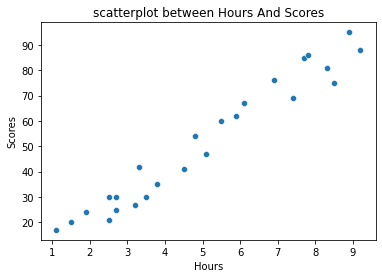

In [7]:
sns.scatterplot(x=data['Hours'],y=data['Scores']);
plt.title("scatterplot between Hours And Scores");

In [8]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:xlabel='Hours', ylabel='Density'>

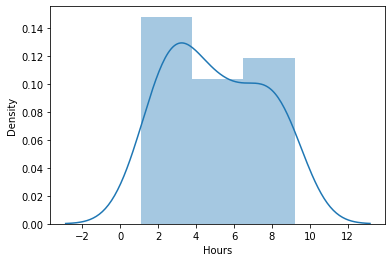

In [10]:
sns.distplot(data['Hours'])

<AxesSubplot:xlabel='Hours', ylabel='Density'>

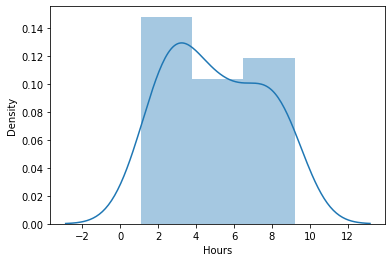

In [11]:
sns.distplot(data['Hours'])

# DATA MODELLING


In [12]:
X= data.iloc[:, :-1].values  
y= data.iloc[:, 1].values 

In [13]:
target = y
feature = X

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(feature, target, train_size=0.8, test_size=0.2,random_state=0)

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:

#y=m*x+c
Y = model.coef_ * X + model.intercept_

In [18]:
def slope_line(line = False):
    plt.scatter(X,y)
    if line:
        plt.plot(X,Y)
        
widgets.interact(slope_line,line=False);

interactive(children=(Checkbox(value=False, description='line'), Output()), _dom_classes=('widget-interact',))

# MODEL PREDICTION FOR VALIDATION DATA

In [19]:
print("Making predictions for the validation data:")
print(X_valid)
print("The predictions are:")
print(model.predict(X_valid))

Making predictions for the validation data:
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
The predictions are:
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# MODEL VALIDATION

In [20]:
mean_absolute_error(y_valid, model.predict(X_valid))

4.183859899002975

# MODEL EVALUATION

In [21]:
r2_score(y_valid, model.predict(X_valid))

0.9454906892105355

# MODEL PREDICTION FOR NEW DATA

In [22]:
x = 9.25
print("If the student study for {} hours per day then, he/she score {} % in exams.".format(x,model.predict([[x]])) )

If the student study for 9.25 hours per day then, he/she score [93.69173249] % in exams.


In [23]:
x = float(input("Enter hours:"))
print("If the student study for {} hours per day then, he/she score {} % in exams.".format(x,model.predict([[x]])) )

Enter hours:6
If the student study for 6.0 hours per day then, he/she score [61.48209893] % in exams.
